Importing the Dependencies

In [ ]:
conda update jupyter

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection & Analysis

In [ ]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv(r'C:\Users\mxj210016\Desktop\Python_Learning\Projects\Project13_Customer_Segmentation_using_K_Means_Clustering\Mall_Customers.csv')

In [ ]:
# first 5 rows in the dataframe
customer_data.head()

In [ ]:
# finding the number of rows and columns
customer_data.shape

In [ ]:
# getting some informations about the dataset
customer_data.info()

In [ ]:
# checking for missing values
customer_data.isnull().sum()

Choosing the Annual Income Column & Spending Score column

In [ ]:
X = customer_data.iloc[:,[3,4]].values
X = customer_data.iloc[:, 3:5].values

In [ ]:
print(X)

Choosing the number of clusters

WCSS  ->  Within Clusters Sum of Squares

In [ ]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

In [ ]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

5 Clusters -  0, 1, 2, 3, 4

Visualizing all the Clusters

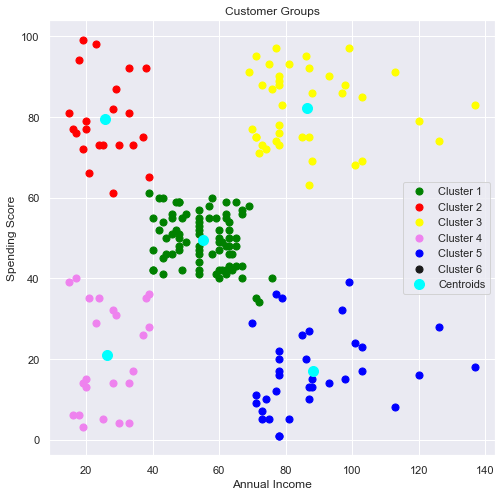

In [108]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')
plt.scatter(X[Y==5,0], X[Y==5,1], s=50, c='k', label='Cluster 6')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [109]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [110]:
data=pd.concat([pd.DataFrame(X), pd.DataFrame(Y)], axis=1)

data.columns=['Annual Income', 'Spending Score', 'class']
data

,Annual Income,Spending Score,class
0,15,39,3
1,15,81,1
2,16,6,3
3,16,77,1
4,17,40,3
...,...,...,...
195,120,79,2
196,126,28,4
197,126,74,2
198,137,18,4


In [111]:
data['class'].value_counts()

0    81
2    39
4    35
3    23
1    22
Name: class, dtype: int64

In [112]:
data.groupby('class').mean()
std=data.groupby('class').std()

In [113]:
std

,Annual Income,Spending Score
class,,
0,8.988109,6.530909
1,7.566731,10.504174
2,16.312485,9.364489
3,7.893811,13.017167
4,16.399067,9.952154


In [114]:
from sklearn.decomposition import PCA
 
#Load Data
data = customer_data.iloc[:, 2:5].values
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
df.shape

(200, 2)

In [117]:
kmean = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
df_Y = kmean.fit_predict(df)

print(df_Y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 4 2 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 4 1 4 1 0 1 0 1 4 1 0 1 0 1 0 1 0 1 4 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


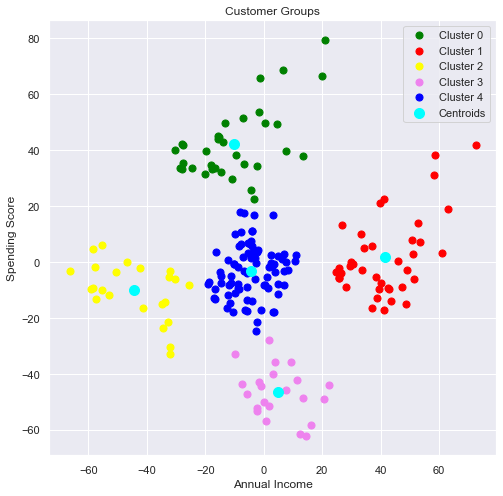

In [133]:
plt.figure(figsize=(8,8))
Y=df_Y
X=df
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 0')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 1')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 2')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 3')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 4')

# plot the centroids
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [134]:
kmeans.cluster_centers_

array([[-10.22346234,  42.33151065],
       [ 41.55109062,   1.86988377],
       [-44.38700009, -10.04934895],
       [  4.98429835, -46.67348852],
       [ -4.41034605,  -3.10054946]])

In [135]:

new_data=pd.concat([pd.DataFrame(df), pd.DataFrame(df_Y)], axis=1)

new_data.columns=['C1', 'C2', 'class']
new_data

,C1,C2,class
0,-31.870508,-33.001425,2
1,0.763397,-56.843865,3
2,-57.408726,-13.122936,2
3,-2.169896,-53.477905,3
4,-32.174920,-30.387005,2
...,...,...,...
195,58.353072,31.016926,1
196,19.909355,66.446425,0
197,58.521858,38.343853,1
198,20.981105,79.375146,0


In [136]:
new_data.groupby('class').mean()

,C1,C2
class,,
0,-10.223462,42.331511
1,41.551091,1.869884
2,-44.387000,-10.049349
3,4.984298,-46.673489
4,-4.410346,-3.100549


In [137]:
kmean.cluster_centers_

array([[-10.22346234,  42.33151065],
       [ 41.55109062,   1.86988377],
       [-44.38700009, -10.04934895],
       [  4.98429835, -46.67348852],
       [ -4.41034605,  -3.10054946]])